# Zillow Time Series

In [1]:
#Exploratory 
import pandas as pd
import numpy as np

#Data Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



#Data Preprocesing

#Data Modeling  
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm


#Data Evaluation 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Ignore any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
raw_df = pd.read_csv('zillow_data.csv')
raw_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


### LOL why RegionName and CountyName ??

In [3]:
#Just in case we want to work with lowercase
#raw_df.columns = raw_df.columns.str.strip().str.lower()

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [4]:
# Cleaning data

raw_df.rename(columns={'RegionName': 'Zipcode',
                       'CountyName':'County'},
              inplace=True)

In [5]:
raw_df.head(2)

,RegionID,Zipcode,City,State,Metro,County,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800


### Choose a State to focus on

In [6]:
raw_df['State'].value_counts()

CA    1224
NY    1015
TX     989
PA     831
FL     785
OH     588
IL     547
NJ     502
MI     499
NC     428
IN     428
MA     417
TN     404
VA     401
MN     375
GA     345
WA     341
WI     332
MO     319
MD     317
CO     249
KS     241
AZ     230
OR     224
OK     221
SC     206
NH     199
LA     193
AL     183
IA     158
MS     153
KY     139
CT     124
UT     121
ID     110
AR     105
NV     103
ME      86
NE      83
WV      72
MT      71
HI      62
NM      60
RI      59
DE      41
WY      31
ND      31
AK      28
SD      19
DC      18
VT      16
Name: State, dtype: int64

## Ask Aidan CA NY or TX
- I want NY

In [7]:
raw_df = raw_df[raw_df['State']=='NY']
raw_df.isna().sum()

RegionID     0
Zipcode      0
City         0
State        0
Metro       52
            ..
2017-12      0
2018-01      0
2018-02      0
2018-03      0
2018-04      0
Length: 272, dtype: int64

In [8]:
raw_df['Metro']

6        New York
10       New York
12       New York
13       New York
20       New York
           ...   
14663      Albany
14693      Albany
14702    Kingston
14715    Kingston
14717         NaN
Name: Metro, Length: 1015, dtype: object

# Step 2: Data Preprocessing

In [9]:
# def get_datetimes(df):
#     """
#     Takes a dataframe:
#     returns only those column names that can be converted into datetime objects 
#     as datetime objects.
#     NOTE number of returned columns may not match total number of columns in passed dataframe
#     """
    
#     return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [10]:
#get_datetimes(raw_df)

# Step 3: EDA and Visualization

In [11]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}


# #plt.rc('font', **font)
# matplotlib.rc('font', **font)

# # NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!
# #plt.gcf().autofmt_xdate()





In [12]:
def stationarity_check(df):
    roll_mean = df.rolling(window=12, center=False).mean()
    roll_std = df.rolling(window=12, center=False).std()
    
    df_test = adfuller(df)
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in df_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    roll_mean.plot()
    roll_std.plot()
    return df_test

In [13]:
#stationarity_check(raw_df)

### I couldnt run those functions ¯\_(ツ)_/¯ 

# Step 4: Reshape from Wide to Long Format

In [14]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['Zipcode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'County'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [15]:
melt_data(raw_df)


,value
time,
1996-04-01,129927.512690
1996-05-01,129850.558376
1996-06-01,129776.142132
1996-07-01,129694.213198
1996-08-01,129623.350254
...,...
2017-12-01,377217.339901
2018-01-01,378981.773399
2018-02-01,380702.463054


In [16]:
raw_df

,RegionID,Zipcode,City,State,Metro,County,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14663,62430,12153,Sand Lake,NY,Albany,Rensselaer,14664,95700.0,95000.0,94300.0,...,191000,191700,192000,193100,195400,198300,200500,202600,205200,207300
14693,62433,12156,Schodack,NY,Albany,Rensselaer,14694,94400.0,94600.0,94800.0,...,188600,189800,189600,190500,191100,192000,193600,196100,198000,199400
14702,62599,12480,Shandaken,NY,Kingston,Ulster,14703,70900.0,70400.0,70000.0,...,160100,160600,160500,160100,159900,159000,157000,157700,161000,163700
14715,62556,12429,Esopus,NY,Kingston,Ulster,14716,78300.0,78300.0,78200.0,...,164200,166600,170000,171000,170700,171300,172400,173600,175800,177500


### ugh

In [17]:

def melt_group_data(df):
    melted = pd.melt(df, id_vars=['Zipcode', 'City', 'State', 'Metro', 'County', 'RegionID', 'SizeRank'], var_name='date')
    melted['date'] = pd.to_datetime(melted['date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('date').aggregate({'value':'mean'})

In [18]:
melt_group_data(raw_df)

,value
date,
1996-04-01,129927.512690
1996-05-01,129850.558376
1996-06-01,129776.142132
1996-07-01,129694.213198
1996-08-01,129623.350254
...,...
2017-12-01,377217.339901
2018-01-01,378981.773399
2018-02-01,380702.463054


In [19]:
mean_prices = melt_group_data(raw_df)
mean_prices

,value
date,
1996-04-01,129927.512690
1996-05-01,129850.558376
1996-06-01,129776.142132
1996-07-01,129694.213198
1996-08-01,129623.350254
...,...
2017-12-01,377217.339901
2018-01-01,378981.773399
2018-02-01,380702.463054


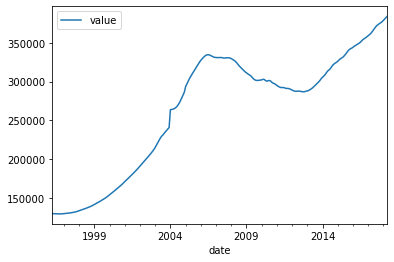

In [20]:
mean_prices.plot();

In [21]:
#Calculate historical return on investment
raw_df['ROI']= (raw_df['2018-04']/raw_df['1996-04'])-1
raw_df['ROI']


#Calculate standard deviation of monthly values
raw_df['std']=raw_df.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1)

#Calculate historical mean value
raw_df['mean']=raw_df.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1)

 
#Show calculated values
raw_df[['Zipcode','std','mean','ROI']].head()


,Zipcode,std,mean,ROI
6,10467,8.569914e+04,2.923392e+05,1.733159
10,11226,2.080187e+05,4.614242e+05,4.945679
12,11375,2.240221e+05,6.081170e+05,3.297147
13,11235,1.665122e+05,4.771932e+05,3.284514
20,10011,2.650867e+06,7.755844e+06,NaN


# Step 5: ARIMA Modeling

# Step 6: Interpreting Results